In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "us-police-shootings"

In [2]:
library(tidyverse)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
shootings <- read_csv("../input/us-police-shootings/shootings.csv")
head(shootings)


── Column specification ────────────────────────────────────────────────────────
cols(
  id = col_double(),
  name = col_character(),
  date = col_date(format = ""),
  manner_of_death = col_character(),
  armed = col_character(),
  age = col_double(),
  gender = col_character(),
  race = col_character(),
  city = col_character(),
  state = col_character(),
  signs_of_mental_illness = col_logical(),
  threat_level = col_character(),
  flee = col_character(),
  body_camera = col_logical(),
  arms_category = col_character()
)




id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
<dbl>,<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>
3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,TRUE,attack,Not fleeing,FALSE,Guns
4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,FALSE,attack,Not fleeing,FALSE,Guns
5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,FALSE,other,Not fleeing,FALSE,Unarmed
8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,TRUE,attack,Not fleeing,FALSE,Other unusual objects
9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,FALSE,attack,Not fleeing,FALSE,Piercing objects
11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,White,Guthrie,OK,FALSE,attack,Not fleeing,FALSE,Guns


In [4]:
shootings <- shootings %>%
    mutate(year = year(date)) %>%
    mutate(manner_of_death=as.factor(manner_of_death), age=as.integer(age), gender=as.factor(gender), race=as.factor(race), 
            state=as.factor(state), threat_level=as.factor(threat_level), flee=as.factor(flee), 
            arms_category=as.factor(arms_category))

shootings[shootings$state=="DC","state"] <- "WA"

In [5]:
summary(shootings) 
class(shootings$year)

       id           name                date                    manner_of_death
 Min.   :   3   Length:4895        Min.   :2015-01-02   shot            :4647  
 1st Qu.:1442   Class :character   1st Qu.:2016-04-03   shot and Tasered: 248  
 Median :2847   Mode  :character   Median :2017-08-04                          
 Mean   :2902                      Mean   :2017-08-22                          
 3rd Qu.:4352                      3rd Qu.:2019-01-03                          
 Max.   :5925                      Max.   :2020-06-15                          
                                                                               
    armed                age        gender         race          city          
 Length:4895        Min.   : 6.00   F: 222   Asian   :  93   Length:4895       
 Class :character   1st Qu.:27.00   M:4673   Black   :1298   Class :character  
 Mode  :character   Median :35.00            Hispanic: 902   Mode  :character  
                    Mean   :36.55       

[1] "numeric"

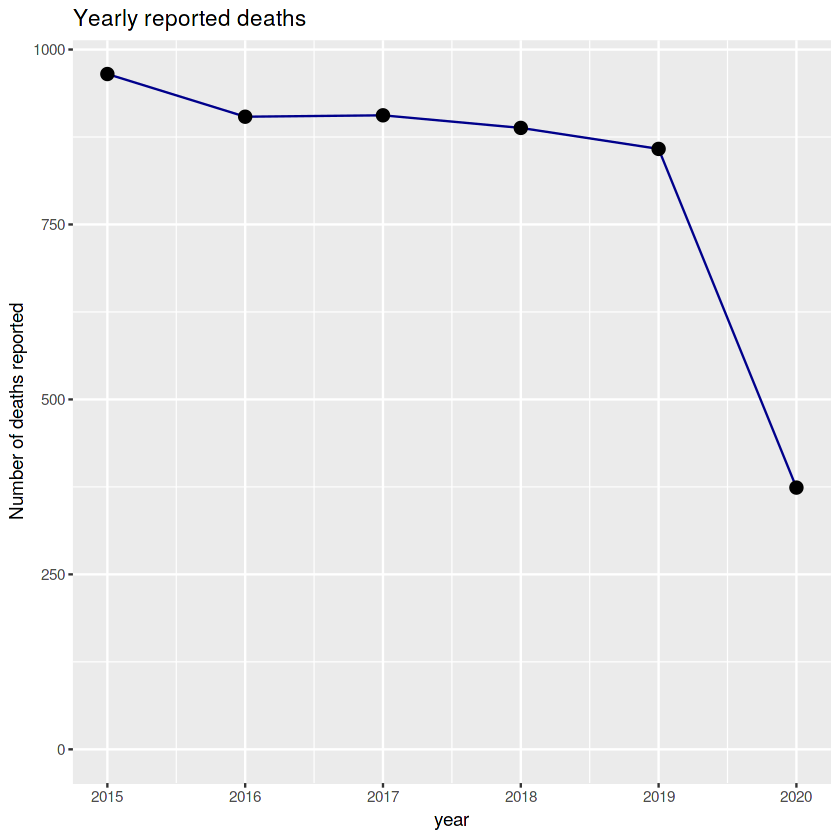

In [6]:
shootings %>%
    group_by(year) %>%
    tally() %>%
    ggplot(aes(year, n)) + 
    geom_line(color="darkblue") + 
    geom_point(size=3) +
    ylab("Number of deaths reported") +
    expand_limits(y=0) +
    ggtitle("Yearly reported deaths")

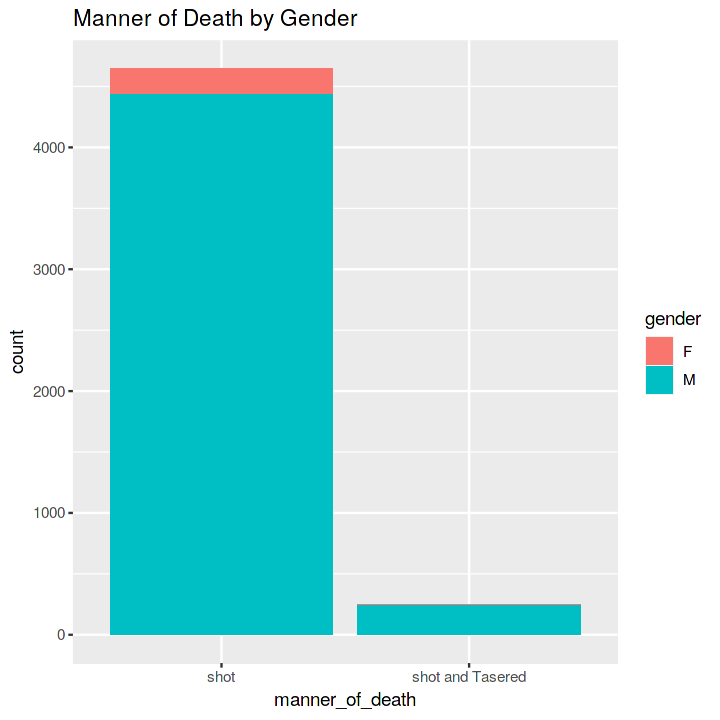

In [7]:
options(repr.plot.width=6, repr.plot.height=6)
shootings %>%
    group_by(manner_of_death) %>% 
    ggplot(aes(manner_of_death, fill=gender)) + 
    geom_bar() +
    ggtitle("Manner of Death by Gender")

gender,average_age
<fct>,<dbl>
F,37.01802
M,36.52536


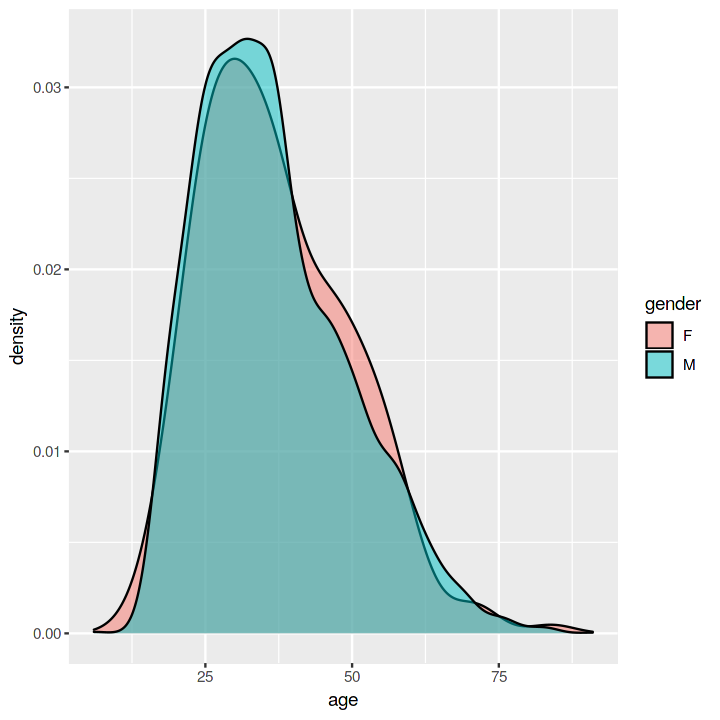

In [8]:
shootings %>%
    group_by(gender) %>%
    ggplot(aes(age, fill=gender)) +
    geom_density(alpha=0.5) 
shootings %>% 
    group_by(gender) %>%
    summarize(average_age=mean(age))

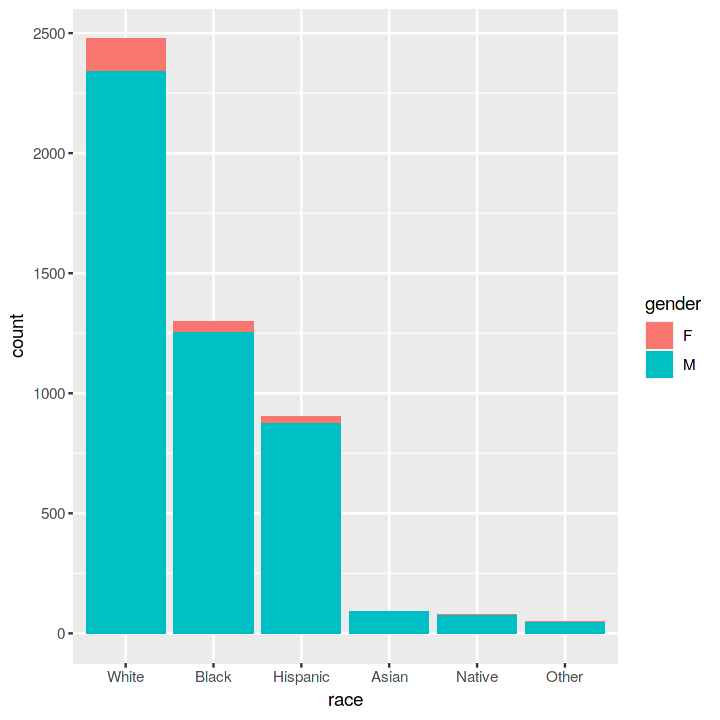

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
shootings %>%
    group_by(race) %>%
    ggplot(aes(fct_infreq(race), fill=gender)) +
    geom_bar() +
    xlab("race")

In [10]:
k <- data.frame(shootings %>% 
    group_by(state) %>%
    arrange(state) %>% 
    tally())
states <- data.frame(state_abb = state.abb, state_names=state.name)
new_data <- cbind(k, states)
l <- new_data %>% select(state_names, n)
l$state_names <- tolower(l$state_names)
centroid <- data.frame(region=tolower(state.name), long=state.center$x, lat=state.center$y)
l <- cbind(l, centroid) %>% select(-region)

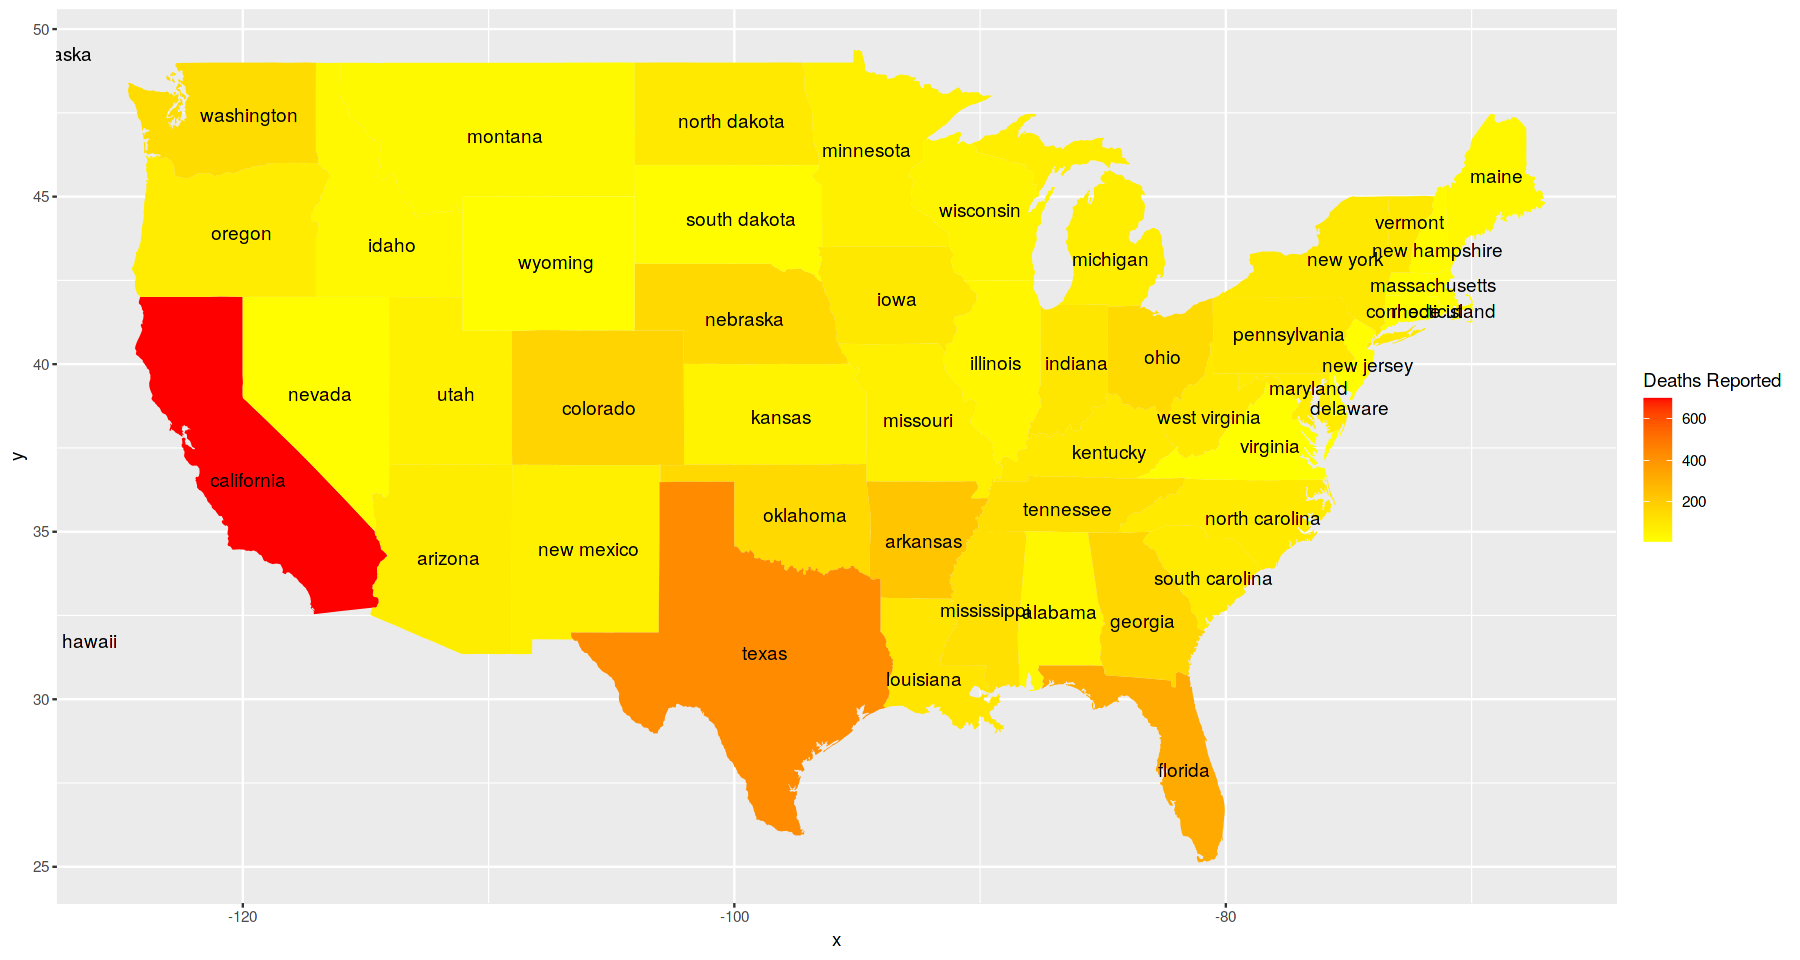

In [11]:
options(repr.plot.width=15, repr.plot.height=8)
map <- map_data("state")
l %>% ggplot(aes(fill=n)) +
    geom_map(aes(map_id=state_names), map=map) +
    expand_limits(x = map$long, y = map$lat) +
    scale_fill_gradient(low="yellow", high="red", name="Deaths Reported") +
    geom_text(x=l$long, y=l$lat, label=l$state_names)

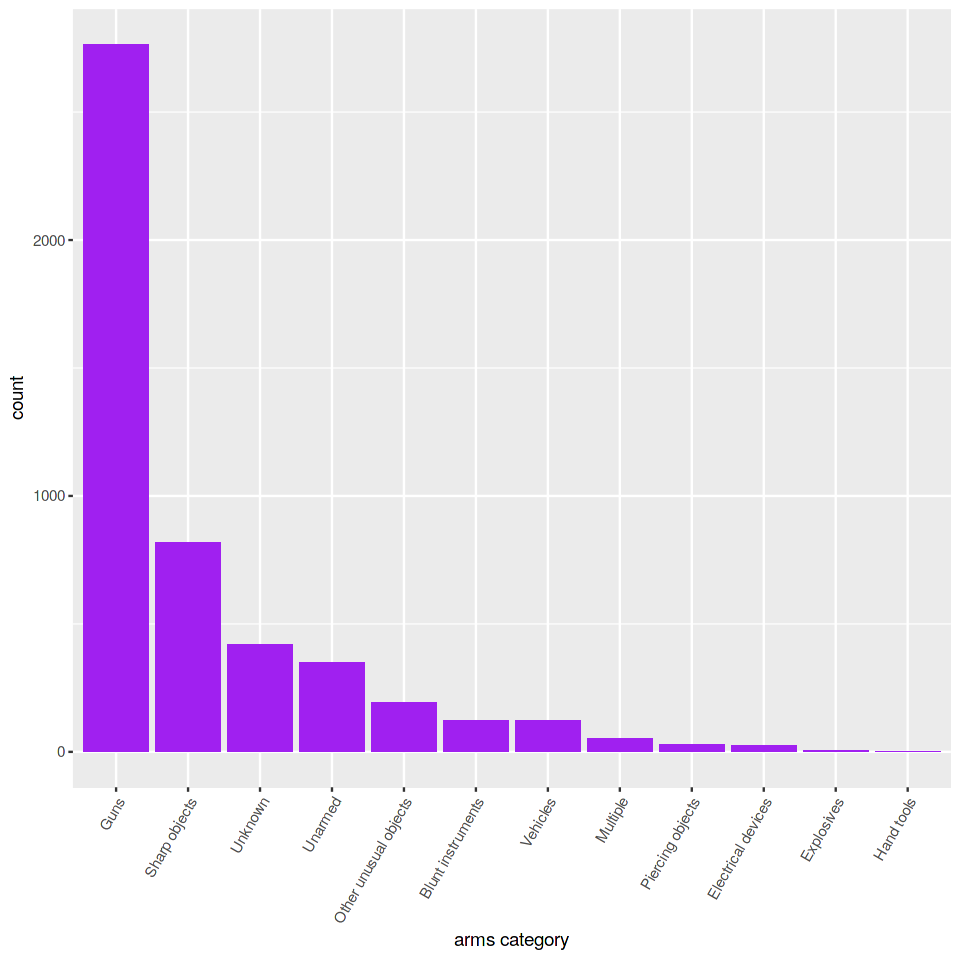

In [12]:
options(repr.plot.width=8, repr.plot.height=8)
shootings %>%
    ggplot(aes(fct_infreq(arms_category))) +
    geom_bar(fill="purple") +
    theme(axis.text.x = element_text(angle = 60, hjust=1)) +
    xlab("arms category")

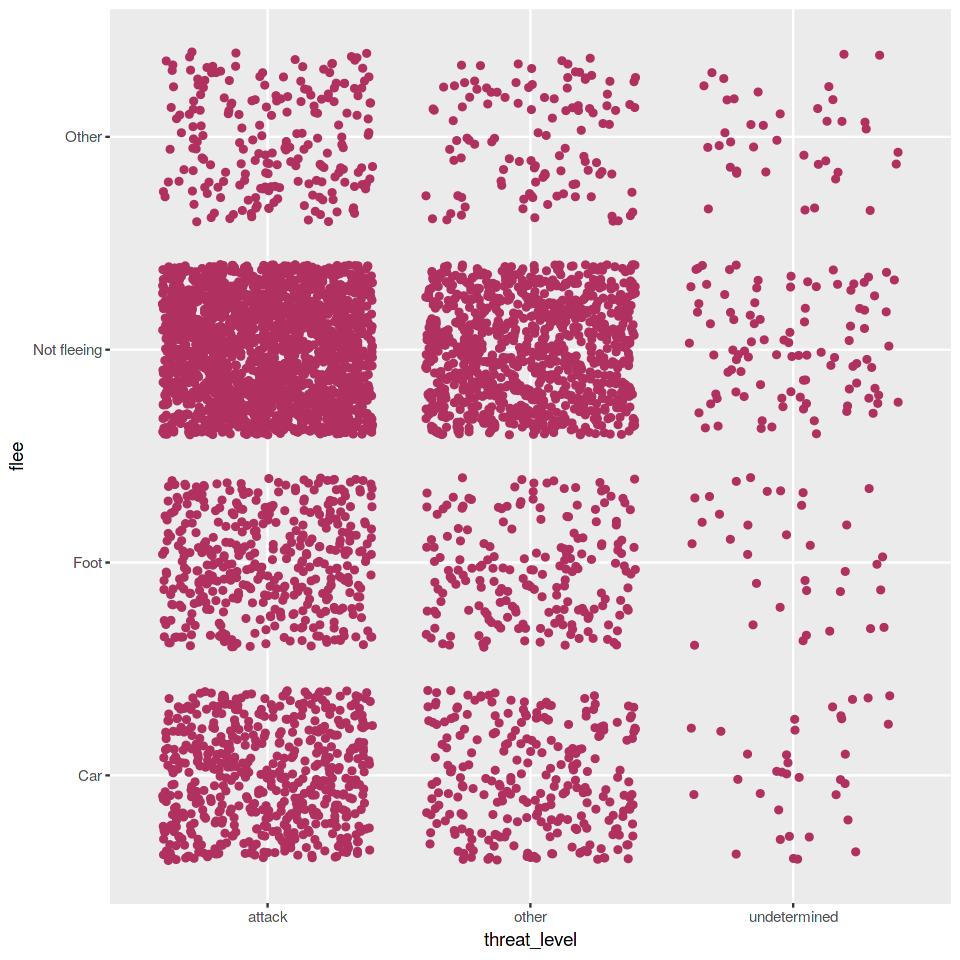

In [13]:
shootings %>%
    ggplot(aes(threat_level, flee)) +
    geom_jitter(color="maroon")

## CONCLUSION:
* Recorded deaths due to shootings in US have declined since 2015.
* More number of males have been shot and tasered as compared to females.
* People from 25-35 years of age are more likely to be shot.
* White people are more prone to shooting followed by Black and Hispanic respectively.
* California, Texas and Florida have most number of reported deaths in US due to shootings.
* People who are shot were armed with guns or any other dangerous objects.
* People who were not fleeing were mostly attacked or threatened.

Decline in Police shootings shows that the innocent people will get justice and laws will be followed strictly in future in US.